In [1]:

import pandas as pd
import numpy as np


from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/Users/ana/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_pair= pd.read_csv('../da-promof-modulo3-sprint1-pairprogramming-Marga-Anabella/ficheros/fichero_pair_30112023.csv', index_col=0)

# Ejercicios gestión de nulos
En este pair programming usaremos el csv que generamos en el pair programming de ayer. El objetivo del ejercicio es identificar las columnas que contienen valores nulos y aplicar un proceso de imputación para manejarlos de manera adecuada.

Instrucciones:
- Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.
- Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.
- Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.
- Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.
- Nota: Puedes utilizar cualquier método o estrategia de imputación que consideres adecuado para los datos y discutir las ventajas y desventajas de tu elección en el informe.

In [3]:
df_pair.head(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,lattitude,longitude,continente
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.93911,67.709953,Asia


In [4]:
df_pair.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'capital/majorcity',
       'co2-emissions', 'cpi', 'cpichange', 'currency-code', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'largestcity', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'officiallanguage',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'lattitude', 'longitude',
       'continente'],
      dtype='object')

In [5]:
df_pair.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            195 non-null    object 
 1   density                            195 non-null    float64
 2   abbreviation                       188 non-null    object 
 3   agriculturalland                   188 non-null    float64
 4   landarea                           194 non-null    float64
 5   armedforcessize                    171 non-null    float64
 6   birthrate                          189 non-null    float64
 7   callingcode                        194 non-null    float64
 8   capital/majorcity                  192 non-null    object 
 9   co2-emissions                      188 non-null    float64
 10  cpi                                178 non-null    float64
 11  cpichange                          179 non-null    float64
 12 

In [6]:

(df_pair.isnull().sum() / df_pair.shape[0]) * 100

country                               0.000000
density                               0.000000
abbreviation                          3.589744
agriculturalland                      3.589744
landarea                              0.512821
armedforcessize                      12.307692
birthrate                             3.076923
callingcode                           0.512821
capital/majorcity                     1.538462
co2-emissions                         3.589744
cpi                                   8.717949
cpichange                             8.205128
currency-code                         7.692308
fertilityrate                         3.589744
forestedarea                          3.589744
gasolineprice                        10.256410
gdp                                   1.025641
grossprimaryeducationenrollment       3.589744
grosstertiaryeducationenrollment      6.153846
infantmortality                       3.076923
largestcity                           3.076923
lifeexpectanc

In [7]:

df_nulos = pd.DataFrame((df_pair.isnull().sum() / df_pair.shape[0]) * 100, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
abbreviation,3.589744
agriculturalland,3.589744
landarea,0.512821
armedforcessize,12.307692
birthrate,3.076923
callingcode,0.512821
capital/majorcity,1.538462
co2-emissions,3.589744
cpi,8.717949
cpichange,8.205128


dividimos por categóricas vs numéricas: 

In [8]:
nulos_categoricos = df_pair[df_pair.columns[df_pair.isnull().any()]].select_dtypes(include = "O").columns
nulos_categoricos


Index(['abbreviation', 'capital/majorcity', 'currency-code', 'largestcity',
       'officiallanguage'],
      dtype='object')

In [9]:
for col in nulos_categoricos:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_pair[col].value_counts() / df_pair.shape[0])
    print("........................")

La distribución de las categorías para la columna ABBREVIATION


abbreviation
AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna CAPITAL/MAJORCITY


capital/majorcity
Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: count, Length: 192, dtype: float64

........................
La distribución de las categorías para la columna CURRENCY-CODE


currency-code
EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: count, Length: 133, dtype: float64

........................
La distribución de las categorías para la columna LARGESTCITY


largestcity
S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna OFFICIALLANGUAGE


officiallanguage
English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: count, Length: 76, dtype: float64

........................


In [10]:
columnas_moda = ["officiallanguage"]
columnas_desconocido = ["largestcity", "currency-code", "capital/majorcity", "abbreviation"]

In [11]:
# moda
for columna in columnas_moda:
    moda = df_pair[columna].mode()[0]    
    df_pair[columna] = df_pair[columna].fillna(moda)

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

df_pair[columnas_moda].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


officiallanguage    0
dtype: int64

In [12]:
# "Uknown"
for columna in columnas_desconocido:

    df_pair[columna] = df_pair[columna].fillna("Unknown")

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_pair[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


largestcity          0
currency-code        0
capital/majorcity    0
abbreviation         0
dtype: int64

# proceso var numéricas

In [13]:
nulos_numericos = df_pair[df_pair.columns[df_pair.isnull().any()]].select_dtypes(include = np.number).columns
nulos_numericos

Index(['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'lattitude',
       'longitude'],
      dtype='object')

In [14]:
df_perc_nulos_num = df_pair[nulos_numericos].isnull().sum() / df_pair.shape[0]
df_perc_nulos_num

agriculturalland                     0.035897
landarea                             0.005128
armedforcessize                      0.123077
birthrate                            0.030769
callingcode                          0.005128
co2-emissions                        0.035897
cpi                                  0.087179
cpichange                            0.082051
fertilityrate                        0.035897
forestedarea                         0.035897
gasolineprice                        0.102564
gdp                                  0.010256
grossprimaryeducationenrollment      0.035897
grosstertiaryeducationenrollment     0.061538
infantmortality                      0.030769
lifeexpectancy                       0.041026
maternalmortalityratio               0.071795
minimumwage                          0.230769
outofpockethealthexpenditure         0.035897
physiciansperthousand                0.035897
population                           0.005128
populationlaborforceparticipation 

In [15]:
df_perc_nulos_num[df_perc_nulos_num < 0.05] #sacamos los que estan por debajo de 5% de nulos y les imputaremos moda o mediana

agriculturalland                   0.035897
landarea                           0.005128
birthrate                          0.030769
callingcode                        0.005128
co2-emissions                      0.035897
fertilityrate                      0.035897
forestedarea                       0.035897
gdp                                0.010256
grossprimaryeducationenrollment    0.035897
infantmortality                    0.030769
lifeexpectancy                     0.041026
outofpockethealthexpenditure       0.035897
physiciansperthousand              0.035897
population                         0.005128
urban_population                   0.025641
lattitude                          0.005128
longitude                          0.005128
dtype: float64

In [16]:
df_perc_nulos_num[df_perc_nulos_num >= 0.05]#sacamos los que estan por encima o igual de 5% de nulos y haremos los dos métodos (iterative - KNN)

armedforcessize                      0.123077
cpi                                  0.087179
cpichange                            0.082051
gasolineprice                        0.102564
grosstertiaryeducationenrollment     0.061538
maternalmortalityratio               0.071795
minimumwage                          0.230769
populationlaborforceparticipation    0.097436
taxrevenue                           0.133333
totaltaxrate                         0.061538
unemploymentrate                     0.097436
dtype: float64

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

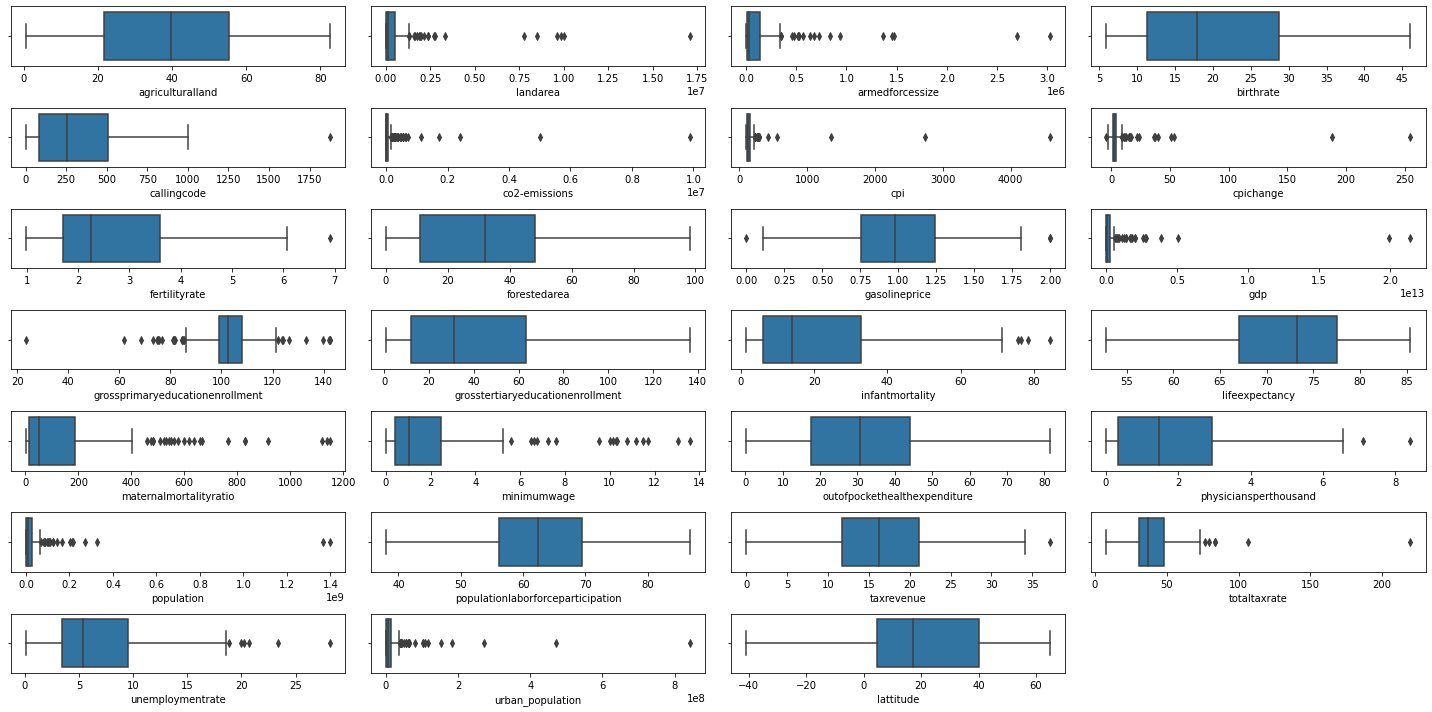

In [17]:

fig, axes = plt.subplots(nrows = 7, ncols = 4, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_numericos):
    sns.boxplot(x = col, data = df_pair, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

Vamos a sacar la media y mediana de todas las columnas con un numero de nulos menor a 5% 

In [18]:
variables_iterar = ['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'lattitude',
       'longitude']

In [19]:
for variable in variables_iterar:
    if variable in df_pair.columns:  
        resultado = df_pair[variable].describe()[["mean", "50%"]]
        display(variable,resultado)

'agriculturalland'

mean    39.117553
50%     39.600000
Name: agriculturalland, dtype: float64

'landarea'

mean    689624.365979
50%     119511.000000
Name: landarea, dtype: float64

'armedforcessize'

mean    159274.853801
50%      31000.000000
Name: armedforcessize, dtype: float64

'birthrate'

mean    20.214974
50%     17.950000
Name: birthrate, dtype: float64

'callingcode'

mean    360.546392
50%     255.500000
Name: callingcode, dtype: float64

'co2-emissions'

mean    177799.239362
50%      12303.000000
Name: co2-emissions, dtype: float64

'cpi'

mean    190.460955
50%     125.340000
Name: cpi, dtype: float64

'cpichange'

mean    6.722346
50%     2.300000
Name: cpichange, dtype: float64

'fertilityrate'

mean    2.698138
50%     2.245000
Name: fertilityrate, dtype: float64

'forestedarea'

mean    32.015426
50%     32.000000
Name: forestedarea, dtype: float64

'gasolineprice'

mean    1.002457
50%     0.980000
Name: gasolineprice, dtype: float64

'gdp'

mean    4.772959e+11
50%     3.438723e+10
Name: gdp, dtype: float64

'grossprimaryeducationenrollment'

mean    102.470213
50%     102.550000
Name: grossprimaryeducationenrollment, dtype: float64

'grosstertiaryeducationenrollment'

mean    37.963388
50%     31.200000
Name: grosstertiaryeducationenrollment, dtype: float64

'infantmortality'

mean    21.332804
50%     14.000000
Name: infantmortality, dtype: float64

'lifeexpectancy'

mean    72.279679
50%     73.200000
Name: lifeexpectancy, dtype: float64

'maternalmortalityratio'

mean    160.392265
50%      53.000000
Name: maternalmortalityratio, dtype: float64

'minimumwage'

mean    2.194133
50%     1.045000
Name: minimumwage, dtype: float64

'outofpockethealthexpenditure'

mean    32.637234
50%     30.700000
Name: outofpockethealthexpenditure, dtype: float64

'physiciansperthousand'

mean    1.83984
50%     1.46000
Name: physiciansperthousand, dtype: float64

'population'

mean    3.938116e+07
50%     8.826588e+06
Name: population, dtype: float64

'populationlaborforceparticipation'

mean    62.738068
50%     62.450000
Name: populationlaborforceparticipation, dtype: float64

'taxrevenue'

mean    16.573964
50%     16.300000
Name: taxrevenue, dtype: float64

'totaltaxrate'

mean    40.822404
50%     37.200000
Name: totaltaxrate, dtype: float64

'unemploymentrate'

mean    6.886364
50%     5.360000
Name: unemploymentrate, dtype: float64

'urban_population'

mean    2.230454e+07
50%     4.678104e+06
Name: urban_population, dtype: float64

'lattitude'

mean    19.092351
50%     17.273849
Name: lattitude, dtype: float64

'longitude'

mean    20.232434
50%     20.972652
Name: longitude, dtype: float64

- Sustituimos todos los nulls (menor a 5%) de aquellas variables numéricas con la MEDIANA. 

In [20]:

mediana_agriculturalland = df_pair["agriculturalland"].median()
print(f"La media de la columna 'conspriceidx' es: {round(mediana_agriculturalland, 2)}")


df_pair["agriculturalland"] = df_pair["agriculturalland"].fillna(mediana_agriculturalland)


print(f"Después del 'fillna' tenemos {df_pair['agriculturalland'].isnull().sum()} nulos")

La media de la columna 'conspriceidx' es: 39.6
Después del 'fillna' tenemos 0 nulos


EN LOOP 

In [21]:
variables_iterar = ['agriculturalland', 'landarea', 'birthrate',
       'callingcode', 'co2-emissions', 'fertilityrate',
       'forestedarea', 'gdp',
       'grossprimaryeducationenrollment', 
       'infantmortality', 'lifeexpectancy',
        'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'urban_population', 'lattitude',
       'longitude']


for columna in variables_iterar:

    mediana_actual = df_pair[columna].median()
    print(f"La mediana de la columna '{columna}' es: {round(mediana_actual, 2)}")


    df_pair[columna] = df_pair[columna].fillna(mediana_actual)

    print(f"Después de 'fillna', la columna '{columna}' tiene {df_pair[columna].isnull().sum()} valores nulos")


La mediana de la columna 'agriculturalland' es: 39.6
Después de 'fillna', la columna 'agriculturalland' tiene 0 valores nulos
La mediana de la columna 'landarea' es: 119511.0
Después de 'fillna', la columna 'landarea' tiene 0 valores nulos
La mediana de la columna 'birthrate' es: 17.95
Después de 'fillna', la columna 'birthrate' tiene 0 valores nulos
La mediana de la columna 'callingcode' es: 255.5
Después de 'fillna', la columna 'callingcode' tiene 0 valores nulos
La mediana de la columna 'co2-emissions' es: 12303.0
Después de 'fillna', la columna 'co2-emissions' tiene 0 valores nulos
La mediana de la columna 'fertilityrate' es: 2.24
Después de 'fillna', la columna 'fertilityrate' tiene 0 valores nulos
La mediana de la columna 'forestedarea' es: 32.0
Después de 'fillna', la columna 'forestedarea' tiene 0 valores nulos
La mediana de la columna 'gdp' es: 34387229486.0
Después de 'fillna', la columna 'gdp' tiene 0 valores nulos
La mediana de la columna 'grossprimaryeducationenrollment' e

- Las que tienen más de un 5%, veremos que método escogemos: iterative vs KNN

In [22]:
df_copia = df_pair.copy()
df_copia.head(10)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,lattitude,longitude,continente
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europa
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,África
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,73.2,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,Europa
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,África
5,Antigua and Barbuda,223.0,AG,20.5,443.0,0.0,15.33,1.0,"St. John's, Saint John",557.0,113.81,1.2,XCD,1.99,22.3,0.99,1.727759e+09,105.0,24.8,5.0,"St. John's, Saint John",76.9,42.0,3.04,English,24.3,2.76,97118.0,NaN,16.5,43.0,NaN,23800.0,17.060816,-61.796428,América del Norte
6,Argentina,17.0,AR,54.3,2780400.0,105000.0,17.02,54.0,Buenos Aires,201348.0,232.75,53.5,ARS,2.26,9.8,1.10,4.496634e+11,109.7,90.0,8.8,Buenos Aires,76.5,39.0,3.35,Spanish,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0,-38.416097,-63.616672,América del Sur
7,Armenia,104.0,AM,58.9,29743.0,49000.0,13.99,374.0,Yerevan,5156.0,129.18,1.4,AMD,1.76,11.7,0.77,1.367280e+10,92.7,54.6,11.0,Yerevan,74.9,26.0,0.66,Armenian,81.6,4.40,2957731.0,55.6,20.9,22.6,16.99,1869848.0,40.069099,45.038189,Asia
8,Australia,3.0,AU,48.2,7741220.0,58000.0,12.60,61.0,Canberra,375908.0,119.80,1.6,AUD,1.74,16.3,0.93,1.392681e+12,100.3,113.1,3.1,Sydney,82.7,6.0,13.59,English,19.6,3.68,25766605.0,65.5,23.0,47.4,5.27,21844756.0,-25.274398,133.775136,Oceanía
9,Austria,109.0,AT,32.4,83871.0,21000.0,9.70,43.0,Vienna,61448.0,118.06,1.5,EUR,1.47,46.9,1.20,4.463147e+11,103.1,85.1,2.9,Vienna,81.6,5.0,NaN,German,17.9,5.17,8877067.0,60.7,25.4,51.4,4.67,5194416.0,47.516231,14.550072,Europa


In [23]:
df_copia

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,lattitude,longitude,continente
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europa
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,África
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,73.2,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,Europa
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,África
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912050.0,343000.0,17.88,58.0,Caracas,164175.0,2740.27,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,6.423750,-66.589730,América del Sur
191,Vietnam,314.0,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,15.552727,48.516388,Asia
193,Zambia,25.0,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332,África


In [24]:
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[[
    'armedforcessize', 
    'cpi', 
    'cpichange', 
    'gasolineprice', 
    'grosstertiaryeducationenrollment', 
    'maternalmortalityratio', 
    'minimumwage', 
    'populationlaborforceparticipation', 
    'taxrevenue', 
    'totaltaxrate', 
    'unemploymentrate'
]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


array([[3.23000000e+05, 1.49900000e+02, 2.30000000e+00, ...,
        9.30000000e+00, 7.14000000e+01, 1.11200000e+01],
       [9.00000000e+03, 1.19050000e+02, 1.40000000e+00, ...,
        1.86000000e+01, 3.66000000e+01, 1.23300000e+01],
       [3.17000000e+05, 1.51360000e+02, 2.00000000e+00, ...,
        3.72000000e+01, 6.61000000e+01, 1.17000000e+01],
       ...,
       [4.00000000e+04, 1.57580000e+02, 8.10000000e+00, ...,
        1.67562804e+01, 2.66000000e+01, 1.29100000e+01],
       [1.60000000e+04, 2.12310000e+02, 9.20000000e+00, ...,
        1.62000000e+01, 1.56000000e+01, 1.14300000e+01],
       [5.10000000e+04, 1.05510000e+02, 9.00000000e-01, ...,
        2.07000000e+01, 3.16000000e+01, 4.95000000e+00]])

In [25]:
df_copia[['IT_armedforcessize', 'IT_cpi', 'IT_cpichange', 'IT_gasolineprice', 'IT_grosstertiaryeducationenrollment','IT_maternalmortalityratio', 
          'IT_minimumwage', 'IT_populationlaborforceparticipation', 'IT_taxrevenue','IT_totaltaxrate', 'IT_unemploymentrate']] = imputer_iterative_imputado

# comprobamos los nulos
#print(f"Después del 'Iterative' tenemos: \n{df_copia[['age_iterative', 'pdays_iterative', 'euribor_iterative']].isnull().sum()} nulos")

In [26]:
df_copia.head(2)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,lattitude,longitude,continente,IT_armedforcessize,IT_cpi,IT_cpichange,IT_gasolineprice,IT_grosstertiaryeducationenrollment,IT_maternalmortalityratio,IT_minimumwage,IT_populationlaborforceparticipation,IT_taxrevenue,IT_totaltaxrate,IT_unemploymentrate
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia,323000.0,149.90,2.3,0.70,9.7,638.0,0.43,48.9,9.3,71.4,11.12
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europa,9000.0,119.05,1.4,1.36,55.0,15.0,1.12,55.7,18.6,36.6,12.33


- método KNN

In [27]:

imputer_knn = KNNImputer(n_neighbors = 5)


imputer_knn_imputado = imputer_knn.fit_transform(df_copia[[
    'armedforcessize', 
    'cpi', 
    'cpichange', 
    'gasolineprice', 
    'grosstertiaryeducationenrollment', 
    'maternalmortalityratio', 
    'minimumwage', 
    'populationlaborforceparticipation', 
    'taxrevenue', 
    'totaltaxrate', 
    'unemploymentrate'
]])


imputer_knn_imputado

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/ana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


array([[3.2300e+05, 1.4990e+02, 2.3000e+00, ..., 9.3000e+00, 7.1400e+01,
        1.1120e+01],
       [9.0000e+03, 1.1905e+02, 1.4000e+00, ..., 1.8600e+01, 3.6600e+01,
        1.2330e+01],
       [3.1700e+05, 1.5136e+02, 2.0000e+00, ..., 3.7200e+01, 6.6100e+01,
        1.1700e+01],
       ...,
       [4.0000e+04, 1.5758e+02, 8.1000e+00, ..., 2.1140e+01, 2.6600e+01,
        1.2910e+01],
       [1.6000e+04, 2.1231e+02, 9.2000e+00, ..., 1.6200e+01, 1.5600e+01,
        1.1430e+01],
       [5.1000e+04, 1.0551e+02, 9.0000e-01, ..., 2.0700e+01, 3.1600e+01,
        4.9500e+00]])

In [28]:
df_copia[['KN_armedforcessize', 'KN_cpi', 'KN_cpichange', 'KN_gasolineprice', 'KN_grosstertiaryeducationenrollment','KN_maternalmortalityratio', 
          'KN_minimumwage', 'KN_populationlaborforceparticipation', 'KN_taxrevenue','KN_totaltaxrate', 'KN_unemploymentrate']] = imputer_knn_imputado


# comprobamos los nulos
#print(f"Después del 'KNN' tenemos: \n{df_copia[['age_knn', 'pdays_knn', 'euribor_knn']].isnull().sum()} nulos")

In [29]:
df_copia.head(2)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,lattitude,longitude,continente,IT_armedforcessize,IT_cpi,IT_cpichange,IT_gasolineprice,IT_grosstertiaryeducationenrollment,IT_maternalmortalityratio,IT_minimumwage,IT_populationlaborforceparticipation,IT_taxrevenue,IT_totaltaxrate,IT_unemploymentrate,KN_armedforcessize,KN_cpi,KN_cpichange,KN_gasolineprice,KN_grosstertiaryeducationenrollment,KN_maternalmortalityratio,KN_minimumwage,KN_populationlaborforceparticipation,KN_taxrevenue,KN_totaltaxrate,KN_unemploymentrate
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia,323000.0,149.90,2.3,0.70,9.7,638.0,0.43,48.9,9.3,71.4,11.12,323000.0,149.90,2.3,0.70,9.7,638.0,0.43,48.9,9.3,71.4,11.12
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europa,9000.0,119.05,1.4,1.36,55.0,15.0,1.12,55.7,18.6,36.6,12.33,9000.0,119.05,1.4,1.36,55.0,15.0,1.12,55.7,18.6,36.6,12.33


In [30]:
df_pair.describe()["co2-emissions"]

count    1.950000e+02
mean     1.718583e+05
std      8.240967e+05
min      1.100000e+01
25%      2.625500e+03
50%      1.230300e+04
75%      6.194100e+04
max      9.893038e+06
Name: co2-emissions, dtype: float64

In [31]:
df_copia.describe()[["armedforcessize", "IT_armedforcessize","KN_armedforcessize"]]

,armedforcessize,IT_armedforcessize,KN_armedforcessize
count,1.710000e+02,1.950000e+02,1.950000e+02
mean,1.592749e+05,1.592749e+05,1.631035e+05
std,3.806288e+05,3.563077e+05,3.616670e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+04,1.250000e+04,1.200000e+04
50%,3.100000e+04,4.200000e+04,4.000000e+04
75%,1.420000e+05,1.592749e+05,1.592749e+05
max,3.031000e+06,3.031000e+06,3.031000e+06


In [32]:
df_copia.describe()[["cpi", "IT_cpi","KN_cpi"]]

,cpi,IT_cpi,KN_cpi
count,178.000000,195.000000,195.000000
mean,190.460955,190.351273,186.143676
std,397.947380,380.251904,380.515709
min,99.030000,94.815170,99.030000
25%,113.885000,114.415000,113.837000
50%,125.340000,129.610000,125.080000
75%,157.265000,167.790000,158.450000
max,4583.710000,4583.710000,4583.710000


In [33]:

df_copia.describe()[["minimumwage", "IT_minimumwage","KN_minimumwage"]]

,minimumwage,IT_minimumwage,KN_minimumwage
count,150.000000,195.000000,195.000000
mean,2.194133,2.150705,2.670537
std,2.970796,2.781663,2.816353
min,0.010000,-7.557676,0.010000
25%,0.402500,0.485000,0.530000
50%,1.045000,1.230000,1.560000
75%,2.447500,2.627011,4.446000
max,13.590000,13.590000,13.590000


In [34]:
df_copia.to_csv('pair_sin_nulos.cvs')

# Pasos seguidos y Decisiones tomadas: 
1. Revisión del listado de columnas y cuales de ellos tienen valores nulos (en %)
2. División entre aquellas columnas categóricas y numéricas

        - Variables categóricas: 
        
1. Hemos revisado la distribución de los valores de cada columna, para determinar el criterio de limpieza. Los pasos han sido: 

*Categoría "Unkown":* 
- Para la variable currency-code añadimos desconocido ya que no hay una valor predominante. hay 11% de EUR seguido de 4% XOF y 3% USD. (la cantidad de nulos de esa variable es un 7,6%)
- abbreviation: Desconocido. no tenemos un patrón claro. 
- capital: desconocido, igual que para la variable anterior.  
- LARGESTCITY desconocido (es el nombre de la ciudad más grande de ese país)

*Categoría "Reasignación de valor":*
- official language: 15% english, 12% french, (...) imputamos english al ser solo un 2,5% de nulos.

        - Variables numéricas:

1. Hemos revisado el porcentaje de nulos para todas las variables numéricas: 
2. Hemos divido dos grupos: las que tienen menos de un  5% de nulos VS las que tienen un 5% o más. 
3. Del primer grupo (menos de 5%): 
    - Chequeamos los valores de mediana vs media para determinar cual escoger. 
    - Hemos tomado la mediana para aquellas variables que tienen una desviación importante entre los dos valores. 
    - Aquellas variables que no tienen gran diferencia entre ambos valores, también hemos optado por la mediana, respetando así la homogeneización de criterios. 

4. Las columnas con un total de nulos mayor a 5%, hemos revisado ambos métodos: Iterative y KNN: 

    - Al ver ambos métodos, hemos optado por el KNN al tener un nivel de precisión más elevado (revisando los datos más similares).
        